In [1]:
import numpy as np
import torch
from utils import LinCKA2
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import sys
from torch import nn

# 2 Gaussians (or 2 cubes) translation exp

In [3]:
cuda = torch.device('cuda')

def get_cka_test(mean1 = 0,
                 mean2 = 0,
                 var1 = 1,
                 var2 = 1,
                 num_dims = 100,
                 num_pts = 1000,
                 seed = 0,
                 c = 1000,
                 verbose = False,
                 distribution = 'gaussian'):
    np.random.seed(seed)
    
    d = np.random.normal(0,1,[num_dims])
    d /= np.linalg.norm(d)
    
    if distribution == 'gaussian':
        X = np.concatenate( [np.random.normal(mean1, var1, [num_pts, num_dims]), np.random.normal(mean2, var2, [num_pts, num_dims])], axis = 0)
        Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dims]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dims]))], axis = 0)).to(cuda)
    elif distribution == 'uniform':
        # in this case var = side and mean = center
        X = np.concatenate([var1*(np.random.rand(num_pts, num_dims)-var1*0.5*np.ones([num_pts,num_dims]))+mean1*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1), var2*(np.random.rand(num_pts, num_dims)-var2*0.5*np.ones([num_pts,num_dims]))+mean2*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1)], axis = 0)
        Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dims]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dims]))], axis = 0)).to(cuda)
    
    X = torch.Tensor(X).to(cuda)
    
    CKA = LinCKA2()
    if verbose:
        return CKA(X,Y).item(), torch.where(X==Y)
    else:
        return CKA(X,Y).item()

# Translations (multiple seeds)

In [ ]:
num_pts = 10000
num_dims = 1000
num_seeds = 10
c_list = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

diff = []
data = np.zeros([num_seeds, len(c_list)])
for seed in range(num_seeds):
    print(f'seed {seed}')
    for i, c in enumerate(c_list):
        data[seed, i], v = get_cka_test(mean2=1.1, num_dims = num_dims, num_pts = num_pts, c = c, seed = seed, distribution = 'uniform', verbose = True)
        diff.append(v)
            
np.save('two_cubes_exp_lincka2_means_0_1.1_{}seeds_v2.npy'.format(num_seeds), data)

# Invertible linear transformations (with cubes)

In [2]:
def inv_lin_cka_cubes(mean1 = 0,
                var1 = 1,
                mean2 = 0,
                var2 = 1,
                transform_mean = 0,
                transform_var = 1,
                num_dims = 200,
                num_pts = 10000,
                seed = 0,
                distribution = 'gaussian'):
    
    np.random.seed(seed)
    rotation_matrix = np.random.normal(transform_mean, transform_var,[num_dims, num_dims])
#     while np.linalg.cond(rotation_matrix) >= 1/sys.float_info.epsilon:
    while np.linalg.cond(rotation_matrix) >= 3599627370496:
        print(np.linalg.cond(rotation_matrix))
        rotation_matrix = np.random.normal(transform_mean, transform_var,[num_dims, num_dims])
    print('it worked')
    cuda = torch.device('cuda')
    rotation_matrix = torch.Tensor(rotation_matrix).to(cuda)
    
    if distribution == 'gaussian':
        X = np.random.normal(mean1, var1, [int(num_pts*2), num_dims])
    elif distribution == 'uniform':
        # in this case var = side and mean = center
        X = np.concatenate([var1*(np.random.rand(num_pts, num_dims)-var1*0.5*np.ones([num_pts,num_dims]))+mean1*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1), var2*(np.random.rand(num_pts, num_dims)-var2*0.5*np.ones([num_pts,num_dims]))+mean2*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1)], axis = 0)

    X = torch.Tensor(X).to(cuda)
    Y = torch.mm(X,rotation_matrix)

    CKA = LinCKA2()
    return CKA(X,Y).item()

In [3]:
num_pts = 10000#, 10000 and 20000 points makes it crash have other things running as well...
num_dims = 500
num_seeds = 3
mu_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]
sigma_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]


data = np.zeros([num_seeds, len(mu_list), len(sigma_list)])
for seed in range(num_seeds):
    print(f'seed {seed}')
    for i1, mu in enumerate(mu_list):
        for i2, sigma in enumerate(sigma_list):
            data[seed, i1, i2] = inv_lin_cka_cubes(mean1=0, mean2=1.1,num_dims = num_dims, num_pts = num_pts, transform_mean=mu, transform_var=sigma, seed = seed, distribution = 'uniform')
            
# np.save('inv_lin_cka_fig_data_lincka2_10k_cubes_means0_1.1.npy', data)

seed 0
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it worked
it 

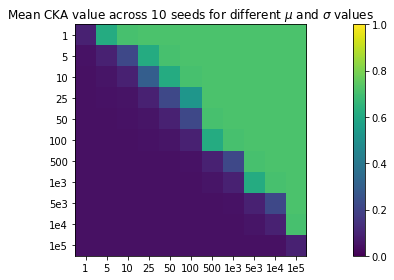

In [4]:
mean_data = np.mean(data, axis = 0)

mu_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3', '1e4', '1e5']
sigma_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3', '1e4', '1e5']
     
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(mean_data, interpolation ='nearest', vmin=0, vmax=1)
fig.colorbar(cax)
ax.set_title(r'Mean CKA value across 10 seeds for different $\mu$ and $\sigma$ values')
ax.set_xticks(np.arange(len(sigma_list)))
ax.set_yticks(np.arange(len(mu_list)))
ax.set_xticklabels(sigma_list_labels)
ax.set_yticklabels(mu_list_labels)
ax.axis('image')
plt.tight_layout()

In [14]:
1/sys.float_info.epsilon

4503599627370496.0